((1954, 1570),
 array([[0.99916667, 0.98798314, 0.99773804, ..., 0.9975    , 1.        ,
         1.        ],
        [0.99552784, 0.98798314, 0.99802078, ..., 0.99525294, 1.        ,
         1.        ],
        [0.98461137, 0.98798314, 0.99802078, ..., 0.99046824, 1.        ,
         1.        ],
        ...,
        [0.67213255, 0.67605412, 0.67605412, ..., 0.96415608, 0.9824702 ,
         0.97854863],
        [0.64896118, 0.64503961, 0.64839569, ..., 0.97098039, 0.97874824,
         0.97874824],
        [0.9318451 , 0.92792353, 0.92343647, ..., 0.99083333, 0.99051294,
         0.99051294]]))

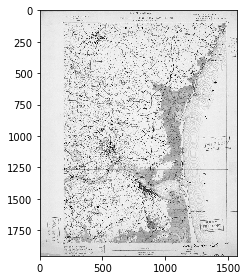

In [10]:
#Copyright 2020 Awase Khirni Syed 
#University of Waterloo, Geospatial Sensing and Data Intelligence Lab,
# feature extraction from topographic maps to render holographic/mixed reality perspectives
#https://uwaterloo.ca/geospatial-sensing/people-profiles/category/45
import pandas as pd 
import numpy as np 

from skimage.io import imread, imshow 

image = imread('https://prd-wret.s3.us-west-2.amazonaws.com/assets/palladium/production/s3fs-public/thumbnails/image/_352890_BrowseImage_0.jpg', as_gray=True)
imshow(image)
#checking image shape 
image.shape, imshow(image)
#fetching features of contours and labels and shading 
features = np.reshape(image, (1954,1570))
features.shape, features 

In [6]:
feature_matrix = np.zeros(((1954,1570)))

In [7]:
feature_matrix.shape

(1954, 1570)

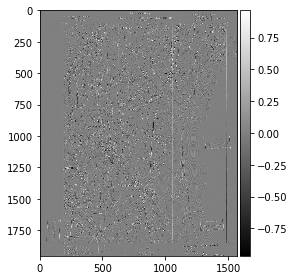

In [14]:
#importing filter dependencies 
from skimage.filters import prewitt_h, prewitt_v
#calculating horizontal edges using prewitt kernel 
edges_prewitt_horizontal = prewitt_h(image)
#calculating vertical edges using prewitt kernel 
edges_prewitt_vertical = prewitt_v(image)

imshow(edges_prewitt_vertical, cmap='gray')

(1954, 1570, 3)


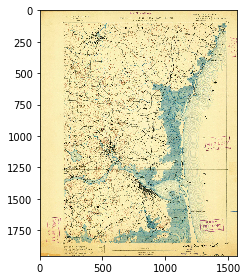

In [16]:
#importing HOG- histogram of gradients 
from skimage.transform import resize 
from skimage.feature import hog 
from skimage import exposure 
import matplotlib.pyplot as plt 
%matplotlib inline 
imgone = imread('https://prd-wret.s3.us-west-2.amazonaws.com/assets/palladium/production/s3fs-public/thumbnails/image/_352890_BrowseImage_0.jpg')
imshow(imgone)
print(imgone.shape)
        

[[[0.87503064 0.74261642 0.46902574]
  [0.88642913 0.74561887 0.43596957]
  [0.91372549 0.78091299 0.47895221]
  ...
  [0.94117647 0.839647   0.57254902]
  [0.92941176 0.82352941 0.54509804]
  [0.93737697 0.84705882 0.59831543]]

 [[0.91528799 0.80548407 0.54365809]
  [0.93333333 0.82509191 0.54108025]
  [0.95058211 0.85254289 0.58195466]
  ...
  [0.94901961 0.85841806 0.5917514 ]
  [0.9372549  0.84313725 0.57411152]
  [0.94509804 0.8627451  0.62444853]]

 [[0.9372549  0.83982604 0.58783701]
  [0.95018382 0.85490196 0.57946586]
  [0.96470588 0.87843137 0.61176471]
  ...
  [0.95294118 0.8627451  0.6       ]
  [0.94117647 0.84705882 0.58000105]
  [0.94901961 0.86758578 0.6283701 ]]

 ...

 [[0.9372549  0.79807225 0.48042519]
  [0.9372549  0.81436887 0.49672181]
  [0.9372549  0.81568627 0.50588235]
  ...
  [0.92941176 0.81176471 0.51980363]
  [0.9254902  0.8        0.50064338]
  [0.92941176 0.80392157 0.5064927 ]]

 [[0.91764706 0.7286152  0.37723652]
  [0.9270527  0.75214461 0.40358887]


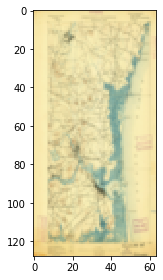

In [21]:
#resize the image 
re_imageone = resize(imgone, (128,64))
imshow(re_imageone)
#lets print the resized image 
print(re_imageone)

#running the histogram of gradients 
fd, hog_image= hog(re_imageone, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, multichannel=True)

In [19]:
fd.shape

(1705860,)

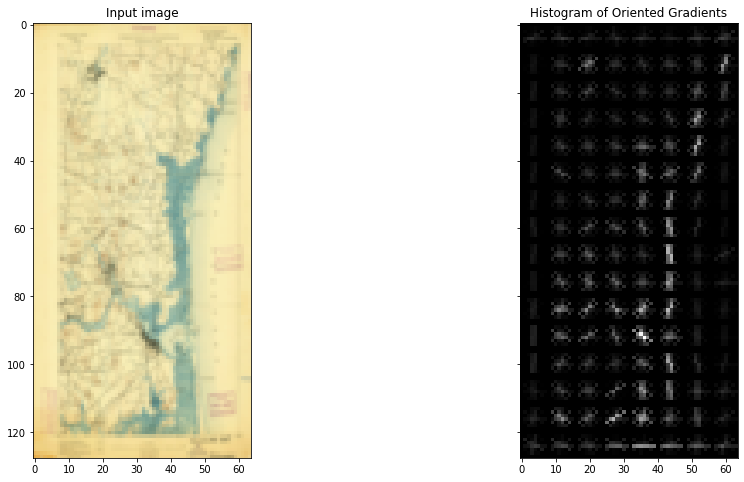

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(re_imageone, cmap=plt.cm.gray) 
ax1.set_title('Input image') 

# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()